<a href="https://colab.research.google.com/github/RozhanoHashemi/smart_environments_lesson/blob/main/Q1Rozhano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import ADASYN #  For data balancing
from sklearn.preprocessing import LabelEncoder

In [3]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1wYgNjWmlFfFlwJ2ykmH_w8yzBXzPLre3

Downloading...
From: https://drive.google.com/uc?id=1wYgNjWmlFfFlwJ2ykmH_w8yzBXzPLre3
To: /content/BankChurners.csv
100% 1.51M/1.51M [00:00<00:00, 141MB/s]


In [4]:
data=pd.read_csv('/content/BankChurners.csv')


سوال اول بخش دوم

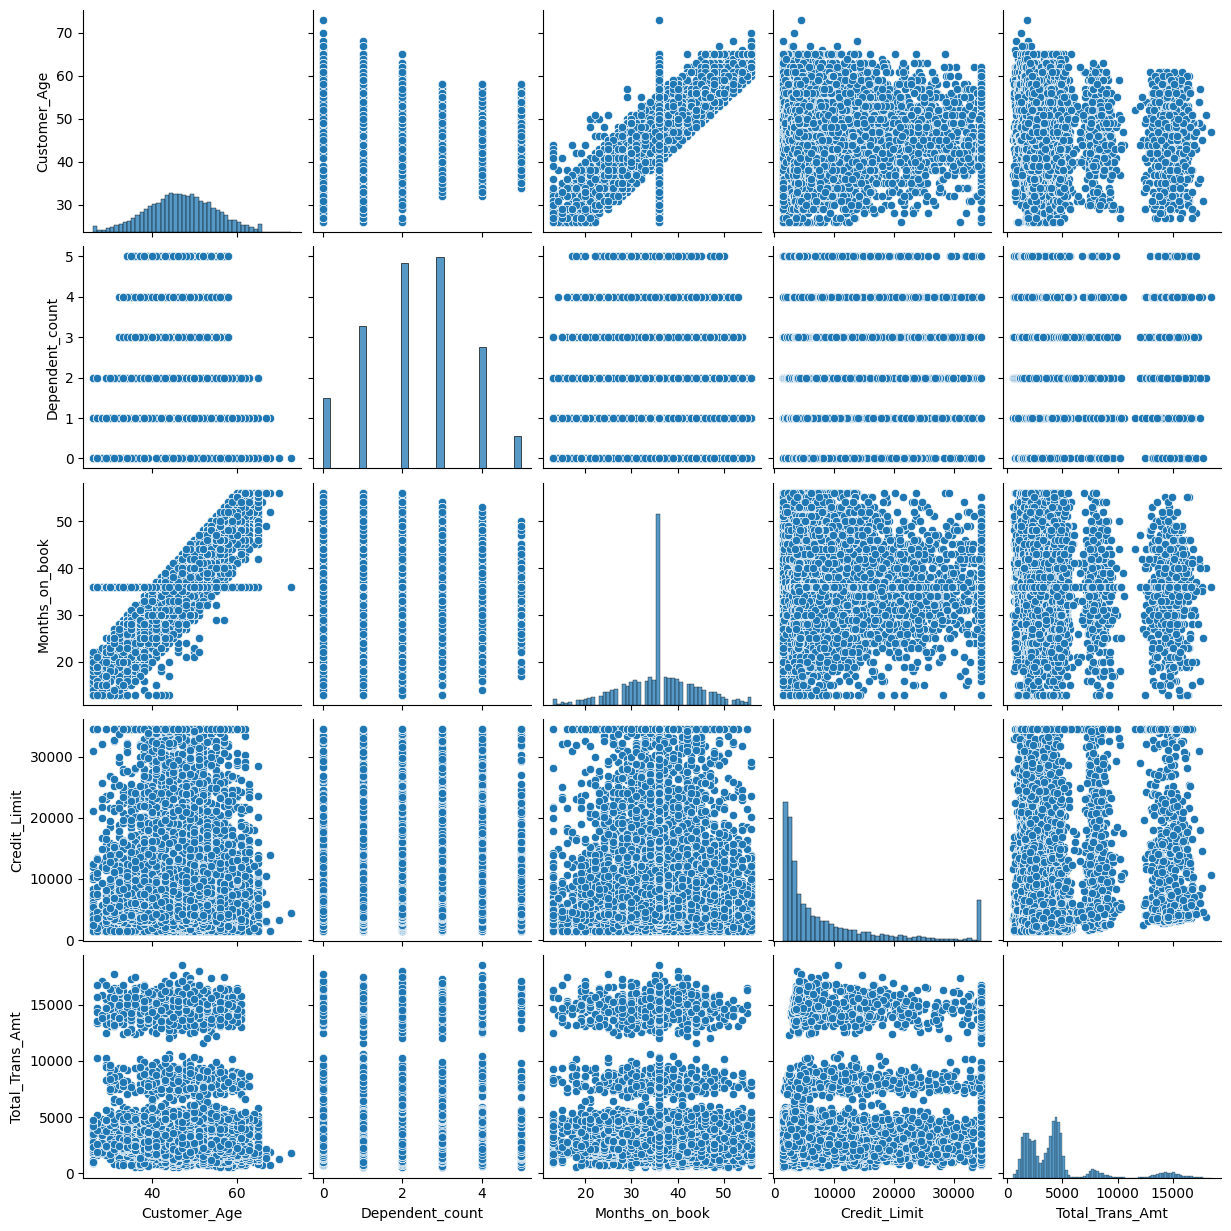

In [5]:
features_to_plot = ['Customer_Age', 'Dependent_count',
                    'Months_on_book', 'Credit_Limit',
                    'Total_Trans_Amt']
pairplot_data = data[features_to_plot]

# Create the pairplot
sns.pairplot(pairplot_data)
plt.show()

سوال اول بخش سوم

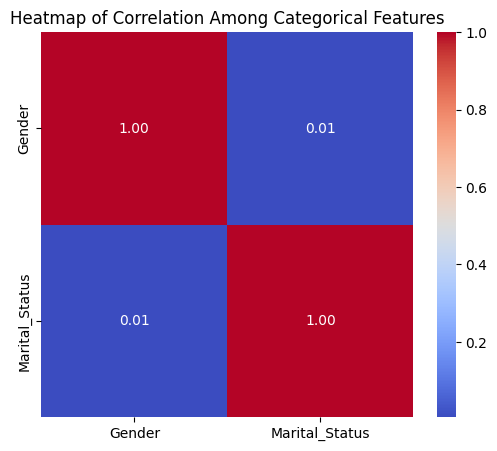

In [ ]:
#chosing 2 categorical features
categorical_columns = ['Gender', 'Marital_Status']
# Encoding categorical features
categorical_data = data[categorical_columns].copy()
categorical_data['Gender'] = categorical_data['Gender'].map({'M': 0, 'F': 1})
categorical_data['Marital_Status'] = categorical_data['Marital_Status'].map({'Married': 0, 'Single': 1, 'Unknown': 2, 'Divorced': 3})
# Calculating the correlation matrix
categorical_correlation = categorical_data.corr()
# Plotting the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(categorical_correlation, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Heatmap of Correlation Among Categorical Features')
plt.show()

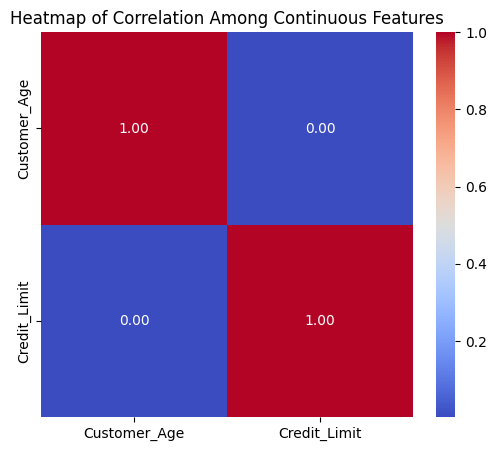

In [ ]:
# Selecting continuous features
continuous_columns = ['Customer_Age', 'Credit_Limit']

# Dropping rows with missing or invalid values (if any)
continuous_data = data[continuous_columns].dropna()

# Calculating the correlation matrix
continuous_correlation = continuous_data.corr()

# Plotting the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(continuous_correlation, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Heatmap of Correlation Among Continuous Features')
plt.show()

سوال اول بخش چهارم

In [ ]:
print(data.isnull().sum())

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

سوال اول بخش پنجم

In [ ]:
#  class names in Attrition_Flag
classes = data['Attrition_Flag'].unique()
print(" classes:", classes)

 classes: ['Existing Customer' 'Attrited Customer']


نمایش توزیع کلاس ها با نمودار پای

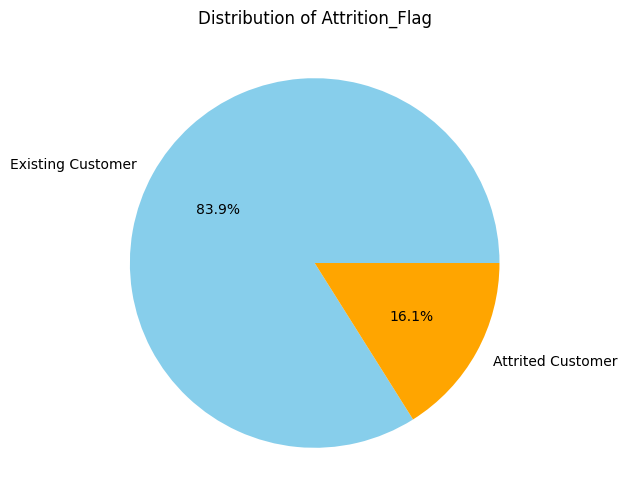

In [ ]:

# class distribution
class_distribution = data['Attrition_Flag'].value_counts()
# plotting
plt.figure(figsize=(6, 6))
class_distribution.plot.pie(autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Distribution of Attrition_Flag')
plt.ylabel('')
plt.show()


سوال شیش

=== BEFORE BALANCING ===

Training Data Classification Report (Before Balancing):
                   precision    recall  f1-score   support

Attrited Customer       1.00      1.00      1.00       981
Existing Customer       1.00      1.00      1.00      5095

         accuracy                           1.00      6076
        macro avg       1.00      1.00      1.00      6076
     weighted avg       1.00      1.00      1.00      6076


Validation Data Classification Report (Before Balancing):
                   precision    recall  f1-score   support

Attrited Customer       1.00      1.00      1.00       305
Existing Customer       1.00      1.00      1.00      1720

         accuracy                           1.00      2025
        macro avg       1.00      1.00      1.00      2025
     weighted avg       1.00      1.00      1.00      2025



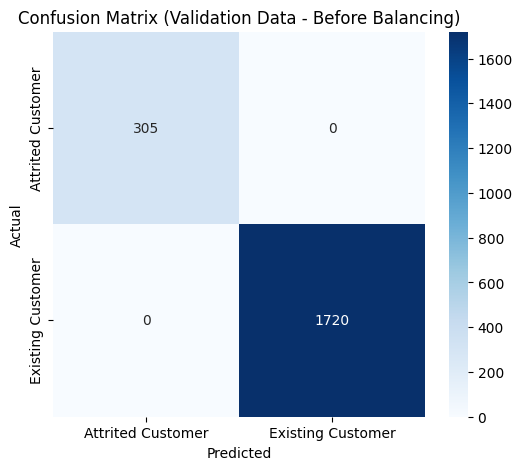

In [ ]:
# BEFORE BALANCING
# Split data into features (X) and target (y)
X = data.drop(columns=['Attrition_Flag', 'CLIENTNUM'])  # Remove unnecessary columns
y = data['Attrition_Flag']

# Encode target variable using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Encode categorical variables into numeric values
X = pd.get_dummies(X, drop_first=True)

# Split data into training, validation, and test sets (60%, 20%, 20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=23)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=23)



print("=== BEFORE BALANCING ===")

# Define the Random Forest model
rf_model_before = RandomForestClassifier(random_state=23, n_estimators=100, max_depth=10)

# Train the model
rf_model_before.fit(X_train, y_train)

# Make predictions on training and validation sets
y_train_pred_before = rf_model_before.predict(X_train)
y_val_pred_before = rf_model_before.predict(X_val)

# Generate and display classification reports
print("\nTraining Data Classification Report (Before Balancing):")
print(classification_report(y_train, y_train_pred_before, target_names=label_encoder.classes_))

print("\nValidation Data Classification Report (Before Balancing):")
print(classification_report(y_val, y_val_pred_before, target_names=label_encoder.classes_))

# Plot confusion matrix for validation data (Before Balancing)
conf_matrix_val_before = confusion_matrix(y_val, y_val_pred_before)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_val_before, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix (Validation Data - Before Balancing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

=== AFTER BALANCING ===


<ipython-input-16-2b1d6d1830f6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_balanced, palette='coolwarm')


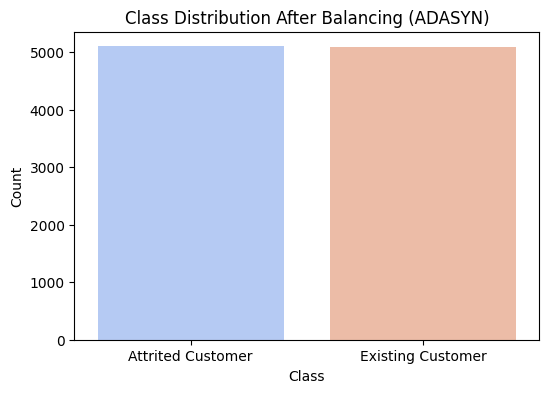


Training Data Classification Report (After Balancing):
                   precision    recall  f1-score   support

Attrited Customer       1.00      1.00      1.00      5097
Existing Customer       1.00      1.00      1.00      5095

         accuracy                           1.00     10192
        macro avg       1.00      1.00      1.00     10192
     weighted avg       1.00      1.00      1.00     10192


Validation Data Classification Report (After Balancing):
                   precision    recall  f1-score   support

Attrited Customer       1.00      1.00      1.00       305
Existing Customer       1.00      1.00      1.00      1720

         accuracy                           1.00      2025
        macro avg       1.00      1.00      1.00      2025
     weighted avg       1.00      1.00      1.00      2025



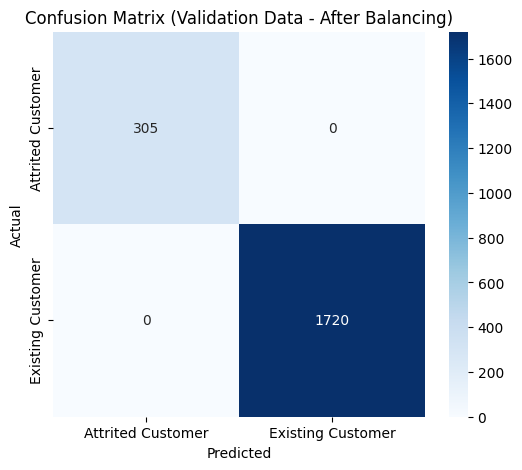

In [ ]:
# ======================
# AFTER BALANCING
# ======================
print("=== AFTER BALANCING ===")

# Apply ADASYN to balance the training set
adasyn = ADASYN(random_state=23)
X_train_balanced, y_train_balanced = adasyn.fit_resample(X_train, y_train)

# Plot class distribution after balancing
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_balanced, palette='coolwarm')
plt.title('Class Distribution After Balancing (ADASYN)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=label_encoder.classes_)
plt.show()

# Define the Random Forest model
rf_model_after = RandomForestClassifier(random_state=23, n_estimators=100, max_depth=10)

# Train the model
rf_model_after.fit(X_train_balanced, y_train_balanced)

# Make predictions on training and validation sets
y_train_pred_after = rf_model_after.predict(X_train_balanced)
y_val_pred_after = rf_model_after.predict(X_val)

# Generate and display classification reports
print("\nTraining Data Classification Report (After Balancing):")
print(classification_report(y_train_balanced, y_train_pred_after, target_names=label_encoder.classes_))

print("\nValidation Data Classification Report (After Balancing):")
print(classification_report(y_val, y_val_pred_after, target_names=label_encoder.classes_))

# Plot confusion matrix for validation data (After Balancing)
conf_matrix_val_after = confusion_matrix(y_val, y_val_pred_after)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_val_after, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix (Validation Data - After Balancing)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


امتیازی

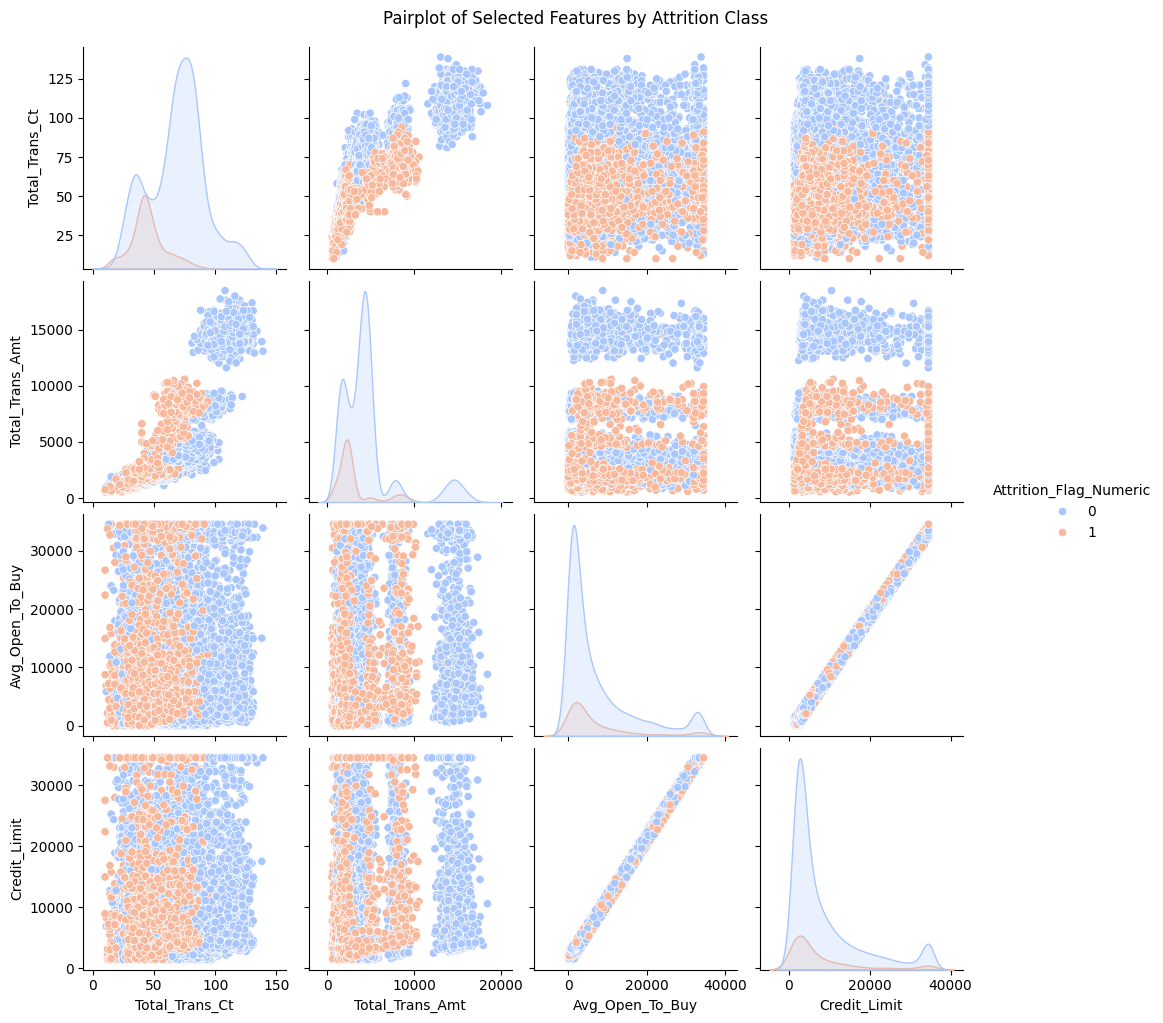

In [6]:
# Map the 'Attrition_Flag' column to numeric values directly
data_visual = data.copy()
data_visual['Attrition_Flag_Numeric'] = data_visual['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

# Select four features to visualize along with the target
selected_features = ['Total_Trans_Ct', 'Total_Trans_Amt', 'Avg_Open_To_Buy', 'Credit_Limit']
selected_features.append('Attrition_Flag_Numeric')  # Add the target column

# Create a pairplot with hue set to Attrition_Flag_Numeric
sns.pairplot(data_visual[selected_features], hue='Attrition_Flag_Numeric', palette='coolwarm', diag_kind='kde')

# Display the plot
plt.suptitle("Pairplot of Selected Features by Attrition Class", y=1.02)  # Adjust title position
plt.show()